<h1 align= 'center'> Image Classification using Convolutional Neural Network</h1>
<h3 align= 'center'> To Classify Photographs of Dogs and Cats </h3>

## The Challenge

The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat.

Although the problem sounds simple, it was only effectively addressed in the last few years using deep learning convolutional neural networks. While the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification.

### Introduction

The dogs vs cats dataset refers to a dataset used for a Kaggle machine learning competition held in 2013.

The dataset is comprised of photos of dogs and cats provided as a subset of photos from a much larger dataset of 3 million manually annotated photos. The dataset was developed as a partnership between Petfinder.com and Microsoft.

It has become a good "Hello World" computer vision dataset for beginners when getting started with convolutional neural networks.

In [1]:
# Importing the Libraries
import matplotlib.pyplot as plt
import os

In [3]:
## Define location of dataset
train_location = '../input/dogs-vs-cats/'

train_dir = os.path.join(train_location, "train.zip")
test_dir = os.path.join(train_location, "test1.zip")

import zipfile
with zipfile.ZipFile(train_dir,"r") as z:
    z.extractall()

with zipfile.ZipFile(test_dir,"r") as z:
    z.extractall()

## Plot Dog and Cat Photos

In [6]:
train_location = './train/'

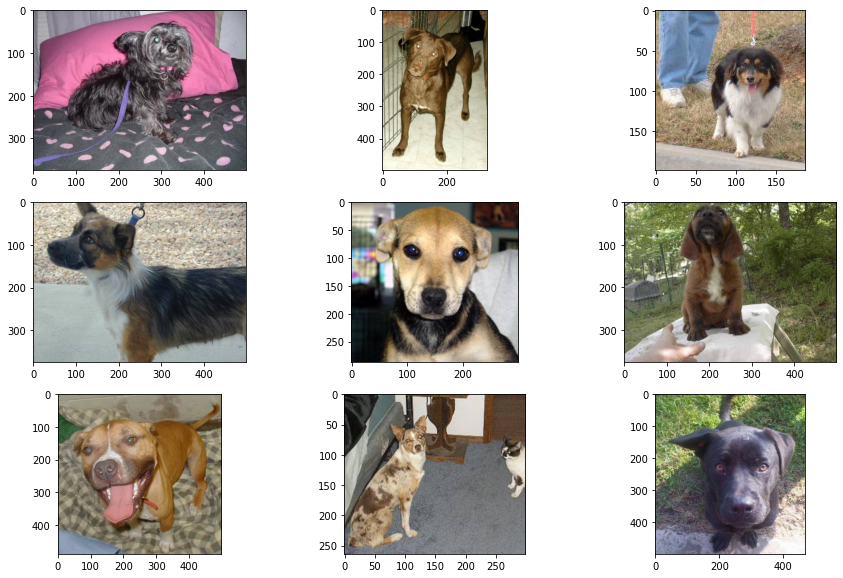

In [7]:
## Display first 9 Dog Images
plt.figure(figsize= (15,10))
for i in range(9):
  plt.subplot(331 + i)
  image = plt.imread(train_location + 'dog.' + str(i) + '.jpg')   ### Reads the image from the location specified by filename
  plt.imshow(image)   ## Displays a 2D array as an Image.
plt.show()

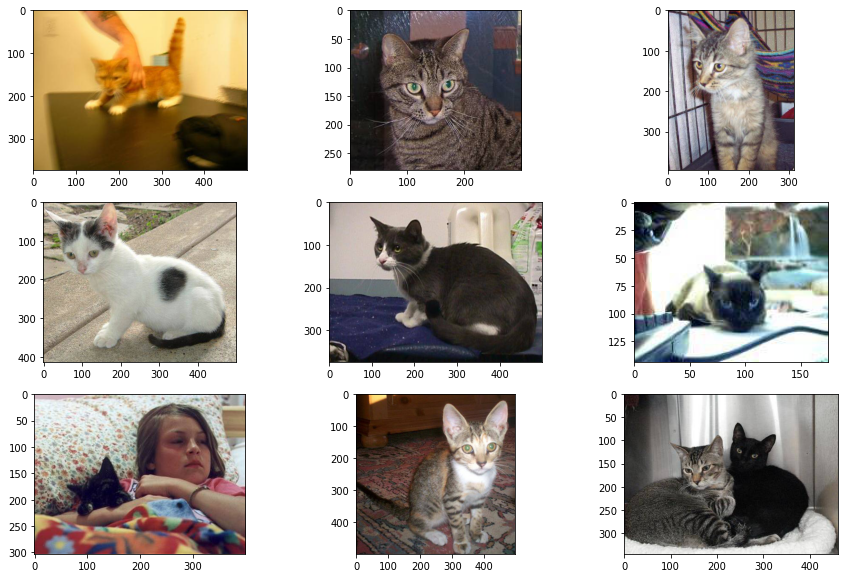

In [8]:
## Display first 9 Cat Images
plt.figure(figsize= (15,10))
for i in range(9):
  plt.subplot(331 + i)
  image = plt.imread(train_location + 'cat.' + str(i) + '.jpg')
  plt.imshow(image)
plt.show()

- Looking at these photos, we can see that the photos are colored and have different shapes and sizes.

- We can see a photo where the cat is barely visible (*bottom left corner (Cat Image)*) and another that has two cats (*lower right corner (Cat Image)*) also we could see that a photho has both dog and cat (*bottom middle corner (Dog Image)*). 

**This suggests that any classifier fit on this problem will have to be robust.**

## Select Standardized Photo Size

The photos will have to be reshaped prior to modeling so that all images have the same shape. This is often a small square image.

There are many ways to achieve this:
- The most common is a simple resize operation that will stretch and deform the aspect ratio of each image and force it into the new shape.

- We could also load all photos and look at the distribution of the photo widths and heights, then design a new photo size that best reflects what we are most likely to see in practice.

We can load the images progressively using the Keras ImageDataGenerator class and flow_from_directory() API. This will be slower to execute but will run on more machines.

This API prefers data to be divided into separate train/ and test/ directories, and under each directory to have a subdirectory for each class. 

> **Example:** a train/dog/ and a train/cat/ subdirectories and the same for test. Images are then organized under the subdirectories.

In [9]:
# importing os module
import os

# Create Directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # Create Label Subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        os.makedirs(newdir, exist_ok=True)   ### Function to create directories in Python

In [10]:
from os import listdir
from shutil import copyfile
from random import seed
from random import random

# Seed Random Number Generator
seed(1)
# Ratio of Pictures to use for Validation
val_ratio = 0.30

# Copy training dataset images into subdirectories
for file in listdir(train_location):
    src = train_location + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/'  + file
        copyfile(src, dst)

## Develop a Baseline CNN Model

A baseline model will establish a minimum model performance to which all of our other models can be compared, as well as a model architecture that we can use as the basis of study and improvement.
<br></br>
A good starting point is the general architectural principles of the VGG models. 

The architecture involves stacking convolutional layers with small 3×3 filters followed by a max pooling layer. Together, these layers form a block, and these blocks can be repeated where the number of filters in each block is increased with the depth of the network such as 32, 64, 128, 256 for the first four blocks of the model.


In [11]:
from keras.models import Sequential     ## A deep learning model.
from keras.layers import Dense, MaxPooling2D, Conv2D, Activation, Flatten, Dropout     ## Different Layers

In [12]:
# Create the Neural Network --> 1-block VGG-style architecture
model1 = Sequential()

## First Convolution Layer -> 28-3+1 = 26x26
model1.add(Conv2D(32, (3,3), padding= 'same', kernel_initializer='he_uniform', input_shape= (200, 200, 3)))    ## Only for this layer we need to specify the Input Shape.
### Preserve Spatial Dimensions of the volume such that the output volume size matches the input volume size.
model1.add(Activation('relu'))     ## Acivation Function -> to make it non-linear
model1.add(MaxPooling2D(pool_size= (2, 2)))      ## MaxPooling Layer -> It will take only a single maximum value of the 2x2 matrix (removes the rest).
                                                ## MaxPooling Layer --> reduces the size to half.


## Fully Conected layer #1
model1.add(Flatten())    ## Before the fully connected layer, we need to Flatten it --> 2D to 1D 
model1.add(Dense(128, kernel_initializer='he_uniform'))    ## Neural Network layer --> 128 neurons
model1.add(Activation('relu'))


## Last Fully Conected layer 
model1.add(Dense(1))    ## This last layer must be 1 since output is binary
model1.add(Activation('sigmoid'))    ##  This activation but be either "sigmoid" (binary) or "softmax" (class probabilities)

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 200, 200, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               40960128  
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [14]:
## Compile the model --> model1
model1.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

### Prepare the data

In [15]:
from keras.preprocessing.image import ImageDataGenerator
# Create Data Generator
datagen = ImageDataGenerator(rescale= 1.0/255.0)

# Prepare iterators
train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/', class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/', class_mode='binary', batch_size=64, target_size=(200, 200))

Found 17495 images belonging to 2 classes.
Found 7505 images belonging to 2 classes.


<p> The model will be fit for 20 epochs, a small number to check if the model can learn the problem.</p>

In [17]:
# Fit the Model
model1.fit(train_it, steps_per_epoch= len(train_it), validation_data= test_it, validation_steps= len(test_it), epochs=20)

Epoch 1/20
274/274 [==============================] - 83s 302ms/step - loss: 0.9912 - accuracy: 0.6767 - val_loss: 0.8087 - val_accuracy: 0.6558
Epoch 2/20
274/274 [==============================] - 80s 292ms/step - loss: 0.3924 - accuracy: 0.8207 - val_loss: 0.6443 - val_accuracy: 0.7154
Epoch 3/20
274/274 [==============================] - 81s 296ms/step - loss: 0.2655 - accuracy: 0.8960 - val_loss: 0.7137 - val_accuracy: 0.7102
Epoch 4/20
274/274 [==============================] - 80s 294ms/step - loss: 0.1780 - accuracy: 0.9383 - val_loss: 0.7317 - val_accuracy: 0.7235
Epoch 5/20
274/274 [==============================] - 81s 296ms/step - loss: 0.1188 - accuracy: 0.9670 - val_loss: 0.7773 - val_accuracy: 0.7258
Epoch 6/20
274/274 [==============================] - 80s 291ms/step - loss: 0.0869 - accuracy: 0.9794 - val_loss: 0.9113 - val_accuracy: 0.7142
Epoch 7/20
274/274 [==============================] - 80s 294ms/step - loss: 0.0845 - accuracy: 0.9798 - val_loss: 0.9828 - val_ac

In [18]:
## Evaluating on validation_data Data
Validation_loss1, Validation_accuracy1 = model1.evaluate(test_it, steps= len(test_it))
print(f'Loss obtained Validation samples is: {Validation_loss1}')
print(f'Accuracy obtained Validation samples is: {Validation_accuracy1}')

118/118 [==============================] - 24s 203ms/step - loss: 2.0230 - accuracy: 0.6998
Loss obtained Validation samples is: 2.0229594707489014
Accuracy obtained Validation samples is: 0.6998001337051392


In [19]:
# Create the Neural Network --> 2-block VGG-style architecture
model2 = Sequential()


## First Convolution Layer 
model2.add(Conv2D(32, (3,3), padding= 'same', kernel_initializer='he_uniform', input_shape= (200, 200, 3)))    ## Only for this layer we need to specify the Input Shape.
### Preserve Spatial Dimensions of the volume such that the output volume size matches the input volume size.
model2.add(Activation('relu'))     ## Acivation Function -> to make it non-linear
model2.add(MaxPooling2D(pool_size= (2, 2)))      ## MaxPooling Layer -> It will take only a single maximum value of the 2x2 matrix (removes the rest).
                                                ## MaxPooling Layer --> reduces the size to half.


## Second Convolution Layer 
model2.add(Conv2D(64, (3,3), padding= 'same', kernel_initializer='he_uniform'))   
model2.add(Activation('relu'))     
model2.add(MaxPooling2D(pool_size= (2, 2)))      
                                            

## Fully Conected layer #1
model2.add(Flatten())    ## Before the fully connected layer, we need to Flatten it --> 2D to 1D 
model2.add(Dense(128, kernel_initializer='he_uniform'))    ## Neural Network layer --> 128 neurons
model2.add(Activation('relu'))


## Last Fully Conected layer 
model2.add(Dense(1))    ## This last layer must be 1 since output is binary
model2.add(Activation('sigmoid'))    ##  This activation but be either "sigmoid" (binary) or "softmax" (class probabilities)

In [20]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
activation_3 (Activation)    (None, 200, 200, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
activation_4 (Activation)    (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 160000)           

In [21]:
## Compile the model --> model2
model2.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [22]:
# Fit the Model
model2.fit(train_it, steps_per_epoch= len(train_it), validation_data= test_it, validation_steps= len(test_it), epochs=20)

Epoch 1/20
274/274 [==============================] - 83s 299ms/step - loss: 2.2894 - accuracy: 0.6261 - val_loss: 0.5606 - val_accuracy: 0.7001
Epoch 2/20
274/274 [==============================] - 81s 295ms/step - loss: 0.4391 - accuracy: 0.7977 - val_loss: 0.5336 - val_accuracy: 0.7482
Epoch 3/20
274/274 [==============================] - 81s 297ms/step - loss: 0.3169 - accuracy: 0.8662 - val_loss: 0.5387 - val_accuracy: 0.7579
Epoch 4/20
274/274 [==============================] - 81s 295ms/step - loss: 0.1915 - accuracy: 0.9302 - val_loss: 0.6214 - val_accuracy: 0.7455
Epoch 5/20
274/274 [==============================] - 81s 296ms/step - loss: 0.1092 - accuracy: 0.9664 - val_loss: 0.6986 - val_accuracy: 0.7618
Epoch 6/20
274/274 [==============================] - 81s 297ms/step - loss: 0.0648 - accuracy: 0.9805 - val_loss: 0.8469 - val_accuracy: 0.7588
Epoch 7/20
274/274 [==============================] - 81s 296ms/step - loss: 0.0375 - accuracy: 0.9917 - val_loss: 0.9946 - val_ac

In [23]:
## Evaluating on validation_data Data
Validation_loss2, Validation_accuracy2 = model2.evaluate(test_it, steps= len(test_it))
print(f'Loss obtained Validation samples is: {Validation_loss2}')
print(f'Accuracy obtained Validation samples is: {Validation_accuracy2}')

118/118 [==============================] - 24s 206ms/step - loss: 1.7372 - accuracy: 0.7658
Loss obtained Validation samples is: 1.7371835708618164
Accuracy obtained Validation samples is: 0.7657561898231506


In [24]:
# Create the Neural Network --> 3-block VGG-style architecture
model3 = Sequential()

## First Convolution Layer 
model3.add(Conv2D(32, (3,3), padding= 'same', kernel_initializer='he_uniform', input_shape= (200, 200, 3)))    ## Only for this layer we need to specify the Input Shape.
model3.add(Activation('relu'))     ## Acivation Function -> to make it non-linear
model3.add(MaxPooling2D(pool_size= (2, 2)))      ## MaxPooling Layer -> It will take only a single maximum value of the 2x2 matrix (removes the rest).
                                                ## MaxPooling Layer --> reduces the size to half.

## Second Convolution Layer 
model3.add(Conv2D(64, (3,3), padding= 'same', kernel_initializer='he_uniform')) 
model3.add(Activation('relu'))   
model3.add(MaxPooling2D(pool_size= (2, 2)))


## Third Convolution Layer 
model3.add(Conv2D(128, (3,3), padding= 'same', kernel_initializer='he_uniform')) 
model3.add(Activation('relu'))   
model3.add(MaxPooling2D(pool_size= (2, 2)))


## Fully Conected layer #1
model3.add(Flatten())    ## Before the fully connected layer, we need to Flatten it --> 2D to 1D 
model3.add(Dense(128, kernel_initializer='he_uniform'))    ## Neural Network layer --> 64 neurons
model3.add(Activation('relu'))


## Last Fully Conected layer 
model3.add(Dense(1))    
model3.add(Activation('sigmoid')) 

In [25]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
activation_7 (Activation)    (None, 200, 200, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
activation_8 (Activation)    (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 128)      

In [26]:
## Compile the model --> model3
model3.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [27]:
# Fit the Model
model3.fit(train_it, steps_per_epoch= len(train_it), validation_data= test_it, validation_steps= len(test_it), epochs=20)

Epoch 1/20
274/274 [==============================] - 84s 305ms/step - loss: 1.0589 - accuracy: 0.6331 - val_loss: 0.4795 - val_accuracy: 0.7746
Epoch 2/20
274/274 [==============================] - 83s 301ms/step - loss: 0.4532 - accuracy: 0.7856 - val_loss: 0.4489 - val_accuracy: 0.7860
Epoch 3/20
274/274 [==============================] - 82s 301ms/step - loss: 0.3425 - accuracy: 0.8508 - val_loss: 0.4457 - val_accuracy: 0.7976
Epoch 4/20
274/274 [==============================] - 82s 301ms/step - loss: 0.2310 - accuracy: 0.9065 - val_loss: 0.4932 - val_accuracy: 0.7924
Epoch 5/20
274/274 [==============================] - 82s 298ms/step - loss: 0.1379 - accuracy: 0.9496 - val_loss: 0.5168 - val_accuracy: 0.8120
Epoch 6/20
274/274 [==============================] - 83s 303ms/step - loss: 0.0681 - accuracy: 0.9778 - val_loss: 0.5816 - val_accuracy: 0.8140
Epoch 7/20
274/274 [==============================] - 82s 299ms/step - loss: 0.0353 - accuracy: 0.9907 - val_loss: 0.7684 - val_ac

In [28]:
## Evaluating on validation_data Data
Validation_loss3, Validation_accuracy3 = model3.evaluate(test_it, steps= len(test_it))
print(f'Loss obtained Validation samples is: {Validation_loss3}')
print(f'Accuracy obtained Validation samples is: {Validation_accuracy3}')

118/118 [==============================] - 24s 204ms/step - loss: 1.1547 - accuracy: 0.8089
Loss obtained Validation samples is: 1.1546810865402222
Accuracy obtained Validation samples is: 0.8089273571968079


### Result Discussion

In [31]:
import pandas as pd 

VGG_models = pd.DataFrame({'Model':['1-Block VGG', '2-Block VGG', '3-Block VGG'],
                      'Score':[round(Validation_accuracy1, 3), round(Validation_accuracy2, 3), round(Validation_accuracy3, 3)]})

print('---Validation Accuracy Scores---')
VGG_models.nlargest(3,'Score')

---Validation Accuracy Scores---


,Model,Score
2,3-Block VGG,0.809
1,2-Block VGG,0.766
0,1-Block VGG,0.700


## Model Developments with Dropout Regularization

Dropout regularization is a computationally cheap way to regularize a deep neural network.

Dropout works by probabilistically removing, or “dropping out,” inputs to a layer, which may be input variables in the data sample or activations from a previous layer. It has the effect of simulating a large number of networks with very different network structures and, in turn, making nodes in the network generally more robust to the inputs.

Typically, a small amount of dropout can be applied after each VGG block, with more dropout applied to the fully connected layers near the output layer of the model.

In [32]:
# Create the Neural Network --> 3-block VGG-style architecture + Dropout 
model4 = Sequential()

## First Convolution Layer 
model4.add(Conv2D(32, (3,3), padding= 'same', kernel_initializer='he_uniform', input_shape= (200, 200, 3)))    ## Only for this layer we need to specify the Input Shape.
model4.add(Activation('relu'))     ## Acivation Function -> to make it non-linear
model4.add(MaxPooling2D(pool_size= (2, 2)))      ## MaxPooling Layer -> It will take only a single maximum value of the 2x2 matrix (removes the rest).
model4.add(Dropout(0.2))


## Second Convolution Layer 
model4.add(Conv2D(64, (3,3), padding= 'same', kernel_initializer='he_uniform')) 
model4.add(Activation('relu'))   
model4.add(MaxPooling2D(pool_size= (2, 2)))
model4.add(Dropout(0.2))


## Third Convolution Layer 
model4.add(Conv2D(128, (3,3), padding= 'same', kernel_initializer='he_uniform')) 
model4.add(Activation('relu'))   
model4.add(MaxPooling2D(pool_size= (2, 2)))
model4.add(Dropout(0.2))


## Fully Conected layer #1
model4.add(Flatten())    ## Before the fully connected layer, we need to Flatten it --> 2D to 1D 
model4.add(Dense(128, kernel_initializer='he_uniform'))    ## Neural Network layer --> 64 neurons
model4.add(Activation('relu'))
model4.add(Dropout(0.5))


## Last Fully Conected layer 
model4.add(Dense(1))    
model4.add(Activation('sigmoid')) 

In [33]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
activation_12 (Activation)   (None, 200, 200, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
activation_13 (Activation)   (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 64)       

In [34]:
## Compile the model --> model4
model4.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [35]:
# Fit the Model
model4.fit(train_it, steps_per_epoch= len(train_it), validation_data= test_it, validation_steps= len(test_it), epochs=20)

Epoch 1/20
274/274 [==============================] - 83s 302ms/step - loss: 3.4673 - accuracy: 0.5061 - val_loss: 0.6932 - val_accuracy: 0.4935
Epoch 2/20
274/274 [==============================] - 83s 304ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6932 - val_accuracy: 0.4935
Epoch 3/20
274/274 [==============================] - 82s 301ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4935
Epoch 4/20
274/274 [==============================] - 82s 300ms/step - loss: 0.6931 - accuracy: 0.5059 - val_loss: 0.6932 - val_accuracy: 0.4935
Epoch 5/20
274/274 [==============================] - 82s 300ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6933 - val_accuracy: 0.4935
Epoch 6/20
274/274 [==============================] - 85s 309ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6933 - val_accuracy: 0.4935
Epoch 7/20
274/274 [==============================] - 83s 302ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6933 - val_ac

In [36]:
## Evaluating on validation_data Data
Validation_loss4, Validation_accuracy4 = model4.evaluate(test_it, steps= len(test_it))
print(f'Loss obtained Validation samples is: {Validation_loss4}')
print(f'Accuracy obtained Validation samples is: {Validation_accuracy4}')

118/118 [==============================] - 24s 201ms/step - loss: 0.6933 - accuracy: 0.4935
Loss obtained Validation samples is: 0.6932953596115112
Accuracy obtained Validation samples is: 0.49353763461112976


## Image Data Augmentation

Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.

Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.

Data augmentation can also act as a regularization technique, adding noise to the training data, and encouraging the model to learn the same features, invariant to their position in the input.

***The augmentations should not be used for the test dataset, as we wish to evaluate the performance of the model on the unmodified photographs.***

In [37]:
from keras.preprocessing.image import ImageDataGenerator
# Create Data Generator
train_datagen = ImageDataGenerator(rescale= 1.0/255.0, width_shift_range= 0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale= 1.0/255.0)

# Prepare iterators
train_it = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/', class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = test_datagen.flow_from_directory('dataset_dogs_vs_cats/test/', class_mode='binary', batch_size=64, target_size=(200, 200))

Found 17495 images belonging to 2 classes.
Found 7505 images belonging to 2 classes.


- In this case, Photos in the training dataset will be augmented with small (10%) random height and width shifts and random horizontal flips that create a mirror image of a photo. 

Photos in both the train and test steps will have their pixel values scaled in the same way.

In [38]:
# Create the Neural Network --> 3-block VGG-style architecture
model5 = Sequential()

## First Convolution Layer 
model5.add(Conv2D(32, (3,3), padding= 'same', kernel_initializer='he_uniform', input_shape= (200, 200, 3)))    ## Only for this layer we need to specify the Input Shape.
model5.add(Activation('relu'))     ## Acivation Function -> to make it non-linear
model5.add(MaxPooling2D(pool_size= (2, 2)))      ## MaxPooling Layer -> It will take only a single maximum value of the 2x2 matrix (removes the rest).
                                                ## MaxPooling Layer --> reduces the size to half.

## Second Convolution Layer 
model5.add(Conv2D(64, (3,3), padding= 'same', kernel_initializer='he_uniform')) 
model5.add(Activation('relu'))   
model5.add(MaxPooling2D(pool_size= (2, 2)))


## Third Convolution Layer 
model5.add(Conv2D(128, (3,3), padding= 'same', kernel_initializer='he_uniform')) 
model5.add(Activation('relu'))   
model5.add(MaxPooling2D(pool_size= (2, 2)))


## Fully Conected layer #1
model5.add(Flatten())    ## Before the fully connected layer, we need to Flatten it --> 2D to 1D 
model5.add(Dense(128, kernel_initializer='he_uniform'))    ## Neural Network layer --> 64 neurons
model5.add(Activation('relu'))


## Last Fully Conected layer 
model5.add(Dense(1))    
model5.add(Activation('sigmoid')) 

In [39]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
activation_17 (Activation)   (None, 200, 200, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
activation_18 (Activation)   (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 128)      

In [40]:
## Compile the model --> model5
model5.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [42]:
# Fit the Model
model5.fit(train_it, steps_per_epoch= len(train_it), validation_data= test_it, validation_steps= len(test_it), epochs=20)

Epoch 1/20
274/274 [==============================] - 209s 762ms/step - loss: 0.6357 - accuracy: 0.6368 - val_loss: 0.5660 - val_accuracy: 0.7057
Epoch 2/20
274/274 [==============================] - 208s 760ms/step - loss: 0.5628 - accuracy: 0.7131 - val_loss: 0.5189 - val_accuracy: 0.7490
Epoch 3/20
274/274 [==============================] - 208s 760ms/step - loss: 0.5288 - accuracy: 0.7367 - val_loss: 0.4851 - val_accuracy: 0.7743
Epoch 4/20
274/274 [==============================] - 207s 756ms/step - loss: 0.4954 - accuracy: 0.7594 - val_loss: 0.4991 - val_accuracy: 0.7692
Epoch 5/20
274/274 [==============================] - 208s 758ms/step - loss: 0.4671 - accuracy: 0.7809 - val_loss: 0.4310 - val_accuracy: 0.8000
Epoch 6/20
274/274 [==============================] - 205s 749ms/step - loss: 0.4369 - accuracy: 0.7965 - val_loss: 0.4280 - val_accuracy: 0.7987
Epoch 7/20
274/274 [==============================] - 206s 753ms/step - loss: 0.4173 - accuracy: 0.8090 - val_loss: 0.3802 -

In [43]:
## Evaluating on validation_data Data
Validation_loss5, Validation_accuracy5 = model5.evaluate(test_it, steps= len(test_it))
print(f'Loss obtained Validation samples is: {Validation_loss5}')
print(f'Accuracy obtained Validation samples is: {Validation_accuracy5}')

118/118 [==============================] - 23s 198ms/step - loss: 0.2716 - accuracy: 0.8854
Loss obtained Validation samples is: 0.27164003252983093
Accuracy obtained Validation samples is: 0.8854097127914429


### Final Comparison of all the Models

In [45]:
VGG_models_Final = pd.DataFrame({'Model':['1-Block VGG', '2-Block VGG', '3-Block VGG', 
                                          '3-Block VGG + Dropout', '3-Block VGG + Data Augmentation'],
                      'Score':[round(Validation_accuracy1, 3), round(Validation_accuracy2, 3), 
                               round(Validation_accuracy3, 3), round(Validation_accuracy4, 3), 
                               round(Validation_accuracy5, 3)]})

print('---Validation Accuracy Scores---')
VGG_models_Final.nlargest(5,'Score')

---Validation Accuracy Scores---


,Model,Score
4,3-Block VGG + Data Augmentation,0.885
2,3-Block VGG,0.809
1,2-Block VGG,0.766
0,1-Block VGG,0.700
3,3-Block VGG + Dropout,0.494


- This is a very crucial point that can be noted. The Accuracy for the **3-Block VGG + Data Augmentation** model is quite high as compared to the remaining models. This can be because of the fact that the model learns from different augments of the image. 